# 【2章】グラフ表現学習入門
以下のコードを一部引用しています。
- https://github.com/PacktPublishing/Graph-Machine-Learning/blob/main/Chapter02/01_embedding_examples.ipynb

## 準備

In [1]:
import random

from karateclub import Graph2Vec
import matplotlib.pyplot as plt
import networkx as nx
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder

In [2]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    """グラフ描画用関数"""
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Node2Vec

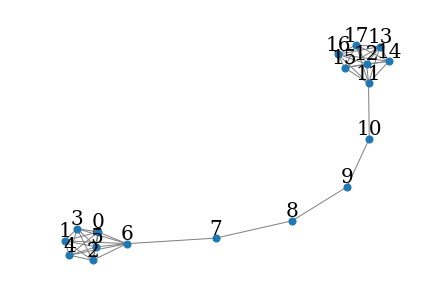

In [3]:
# 適当なグラフを生成
G = nx.barbell_graph(m1=7, m2=4)
draw_graph(G, nx.spring_layout(G))

In [4]:
# それぞれのノードを2次元ベクトルに埋め込み
node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.70it/s]


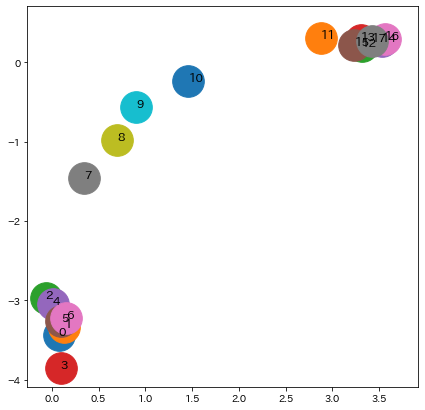

In [5]:
# 各ノードを描画
fig, ax = plt.subplots(figsize=(7,7))
for x in G.nodes():
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

→似たようなノードは似たようなクラスタに集約され、主に3つのクラスタができていることがわかる

## Edge2Vec

In [6]:
# それぞれのエッジを2次元ベクトルに埋め込み（Node2Vecの結果に対して適用）
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

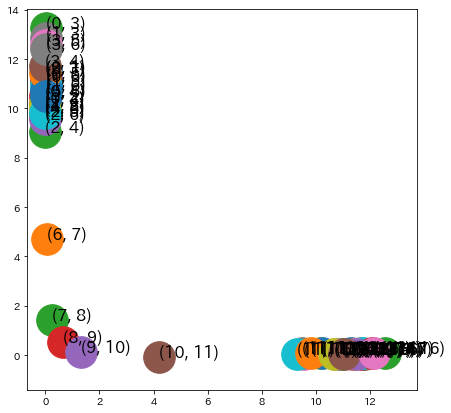

In [7]:
# 各エッジを描画
fig, ax = plt.subplots(figsize=(7,7))
for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

→似たようなエッジは似たようなクラスタに集約されていることがわかる

## Graph2Vec

In [8]:
# グラフ生成
def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

n_graphs = 20
Gs = [generate_radom() for x in range(n_graphs)]

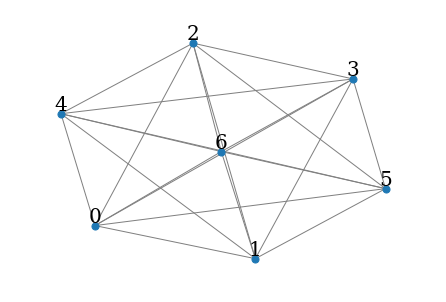

In [9]:
# グラフ例
draw_graph(Gs[0][0], nx.spring_layout(Gs[0][0]))

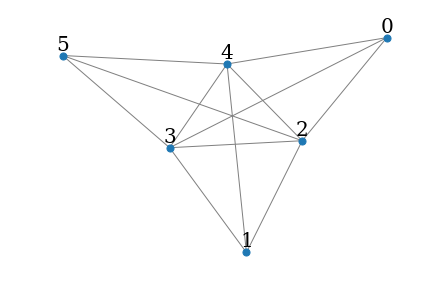

In [10]:
draw_graph(Gs[9][0], nx.spring_layout(Gs[9][0]))

In [11]:
# グラフを二次元ベクトルに埋め込み
model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

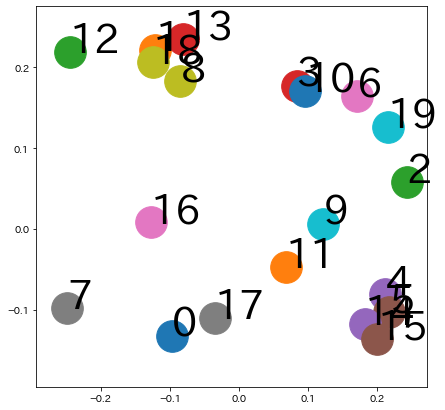

In [12]:
# 各グラフを描画
fig, ax = plt.subplots(figsize=(7,7))
for i,vec in enumerate(embeddings):
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)

→似たような構造のグラフは、似たようなクラスタに集約されてる（はず）